In [ ]:
import cv2

In [ ]:
#this was created because Google Colab does not allow cv2.imshow, so must patch by cv2_imshow.  
#If we switch over to regular jupyter notebook not on Colab, we can change c2_imshow to cv2.imshow.  
from google.colab.patches import cv2_imshow #only used when running in Google Colab 
def my_imshow(title, img ):
  cv2_imshow(img) #should be changed to c2.imshow when not in Colab

In [ ]:
path = ""
fileNameTemplate = path + "t_character.png"
fileNameImage = path + "text_image.png"

#RGB images in BGR order in OpenCV
template = cv2.imread(fileNameTemplate, cv2.IMREAD_COLOR)
image = cv2.imread(fileNameImage, cv2.IMREAD_COLOR)

# Print error message if image is null
if template is None or image is None:
    print('Could not read image')
else: 
    print("Image file read success...")
    my_imshow("template", template)
    my_imshow("image", image)

In [ ]:
# Get the size of the image
height, width = image.shape[:2]
print("Width:", width)
print("Height:", height)

In [47]:
import cv2
import numpy as np

#this was created because Google Colab does not allow cv2.imshow, so must patch by cv2_imshow.  
#If we switch over to regular jupyter notebook not on Colab, we can change c2_imshow to cv2.imshow.  
from google.colab.patches import cv2_imshow #only used when running in Google Colab 
def my_imshow(title, img ):
  cv2_imshow(img) #should be changed to c2.imshow when not in Colab

# Set a threshold for detection
threshold = 0.9
match_x = []
match_y = []

# Read the template and larger images
template = cv2.imread("t_character.png", 2)
image = cv2.imread("text_image.png", 2)

# Get the size of the template and input images
template_height, template_width = template.shape
image_height, image_width = image.shape
print("template:", template_height, template_width)
print("image:", image_height, image_width)
print(template)

template: 9 8
image: 851 634
[[255 255 165  68 245 255 255 255]
 [255 255 165  68 245 255 255 255]
 [165   0   0   0   0   0  21 205]
 [255 255 165  68 245 255 255 255]
 [255 255 165  68 245 255 255 255]
 [255 255 165  68 245 255 255 255]
 [255 255 165  68 245 255 255 255]
 [255 255 201  21 205 255 255 255]
 [255 255 255 128   0   0  21 205]]


[43, 43, 43, 75, 107, 187, 243, 107, 123, 67, 107, 395, 443, 235, 75, 195, 267, 75, 99, 123, 139, 91, 91, 19, 107, 163, 51, 67, 155, 67, 163, 531, 571, 51, 67, 155, 211, 67, 131, 43, 67, 147, 171, 27, 163]
[8, 26, 44, 44, 44, 44, 44, 152, 152, 188, 188, 188, 188, 206, 224, 224, 224, 296, 296, 314, 314, 332, 350, 458, 458, 494, 512, 548, 548, 584, 620, 620, 620, 638, 674, 674, 674, 710, 710, 818, 818, 818, 818, 836, 836]


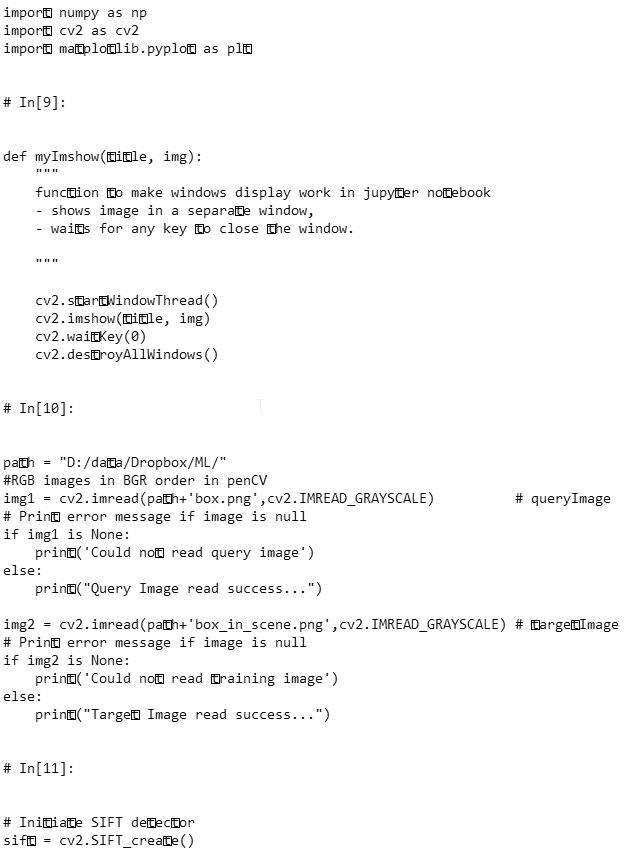

In [48]:
# Iterate over the input image
for i in range(8, image_height-8):
    for j in range(7, image_width-7):
        # Extract the sub-image
        sub_image = image[i:i+template_height, j:j+template_width]
        if (template == sub_image).all():
            # Append the x, y coordinates to the matching lists
            match_x.append(j)
            match_y.append(i)
        
print(match_x)
print(match_y)

# Draw bounding boxes on the image
for i in range(len(match_x)):
  markedImage = cv2.rectangle(image, (match_x[i], match_y[i]), (match_x[i]+template_width, match_y[i]+template_height), (0, 0, 255), 1)

# Show the image
my_imshow("Template Matching", markedImage)
cv2.waitKey(0)
cv2.destroyAllWindows()
